In [49]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [50]:
#  Download stock price data
apple = yf.download('AAPL', start='2017-01-01', end='2023-12-31')
samsung = yf.download('005930.KS', start='2017-01-01', end='2023-12-31')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [51]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,26.921551,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.891415,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.028173,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.329479,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.579805,134247600


In [52]:
samsung.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,35980.0,36240.0,35880.0,36100.0,29680.416016,4650600
2017-01-03,36280.0,36620.0,36020.0,36480.0,29992.843750,7357650
2017-01-04,36500.0,36520.0,36100.0,36160.0,29729.750000,7971750
2017-01-05,36060.0,36060.0,35540.0,35560.0,29236.443359,10967450
2017-01-06,36180.0,36440.0,36040.0,36200.0,29762.634766,8880950


In [31]:
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,99.955950,101.068367,98.920241,100.047322,97.989058,1.075000e+08
std,53.655976,54.245966,53.102108,53.701089,53.915873,5.381399e+07
min,28.950001,29.082500,28.690001,29.004999,26.891415,2.404830e+07
25%,46.526875,46.900624,46.174999,46.525624,44.296705,7.326460e+07
50%,91.264999,92.793751,90.738750,91.421249,89.180153,9.398185e+07
75%,148.830006,150.290001,147.434994,148.962505,146.881874,1.276278e+08
max,198.020004,199.619995,197.000000,198.110001,197.361084,4.479400e+08


In [32]:
samsung.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1716.000000,1716.000000,1716.000000,1716.000000,1716.000000,1.716000e+03
mean,58291.515152,58810.285548,57750.600233,58264.189977,53113.851003,1.453348e+07
std,12902.588075,12963.195417,12818.271486,12870.597893,14100.932786,7.792728e+06
min,35980.000000,36060.000000,35540.000000,35560.000000,29236.443359,0.000000e+00
25%,47042.500000,47400.000000,46572.500000,47000.000000,40109.398438,9.837303e+06
50%,56200.000000,56900.000000,55700.000000,56200.000000,51010.792969,1.290276e+07
75%,69050.000000,69900.000000,68625.000000,69325.000000,66287.326172,1.720842e+07
max,90300.000000,96800.000000,89500.000000,91000.000000,84669.195312,9.030618e+07


In [33]:
#  Calculate daily returns
apple['Returns'] = apple['Adj Close'].pct_change()
samsung['Returns'] = samsung['Adj Close'].pct_change()

In [34]:
#  Define pre-Covid and Covid periods
pre_covid_start = '2017-01-01'
pre_covid_end = '2020-01-31'
covid_start = '2020-02-01'
covid_end = '2023-12-31'

In [35]:
# Separate data into periods
apple_pre_covid = apple[pre_covid_start:pre_covid_end]
apple_covid = apple[covid_start:covid_end]

samsung_pre_covid = samsung[pre_covid_start:pre_covid_end]
samsung_covid = samsung[covid_start:covid_end]

In [37]:
#  Calculate volatility (standard deviation of daily returns)
apple_pre_covid_vol = apple_pre_covid['Returns'].std() * np.sqrt(252)  # Annualized volatility
apple_covid_vol = apple_covid['Returns'].std() * np.sqrt(252)
samsung_pre_covid_vol = samsung_pre_covid['Returns'].std() * np.sqrt(252)
samsung_covid_vol = samsung_covid['Returns'].std() * np.sqrt(252)

In [38]:
print(f"Apple Pre-Covid Volatility: {apple_pre_covid_vol}")
print(f"Apple Covid Volatility: {apple_covid_vol}")
print(f"Samsung Pre-Covid Volatility: {samsung_pre_covid_vol}")
print(f"Samsung Covid Volatility: {samsung_covid_vol}")


Apple Pre-Covid Volatility: 0.2476310957785255
Apple Covid Volatility: 0.33682353968111883
Samsung Pre-Covid Volatility: 0.2494575119198073
Samsung Covid Volatility: 0.25292983870586055


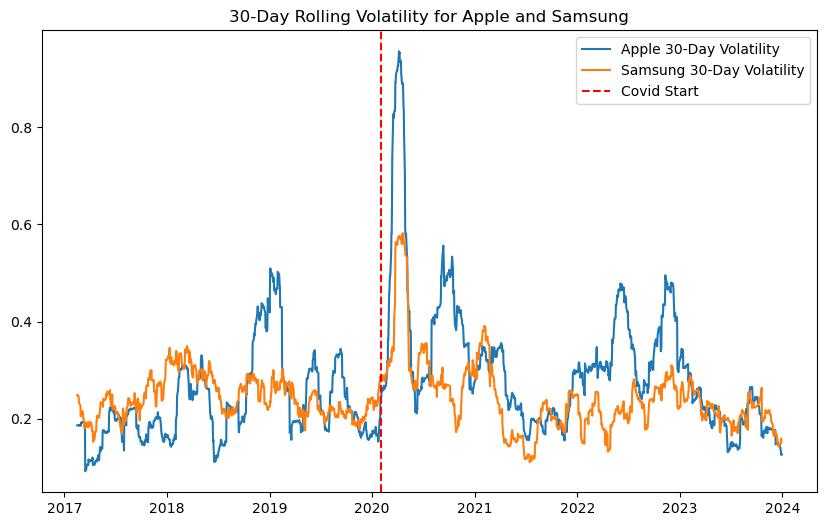

In [39]:
# 5. Plot volatility changes
plt.figure(figsize=(10,6))
plt.plot(apple.index, apple['Returns'].rolling(window=30).std() * np.sqrt(252), label='Apple 30-Day Volatility')
plt.plot(samsung.index, samsung['Returns'].rolling(window=30).std() * np.sqrt(252), label='Samsung 30-Day Volatility')
plt.axvline(pd.Timestamp('2020-02-01'), color='red', linestyle='--', label='Covid Start')
plt.title('30-Day Rolling Volatility for Apple and Samsung')
plt.legend()
plt.savefig('my_plot3.png')
plt.show()

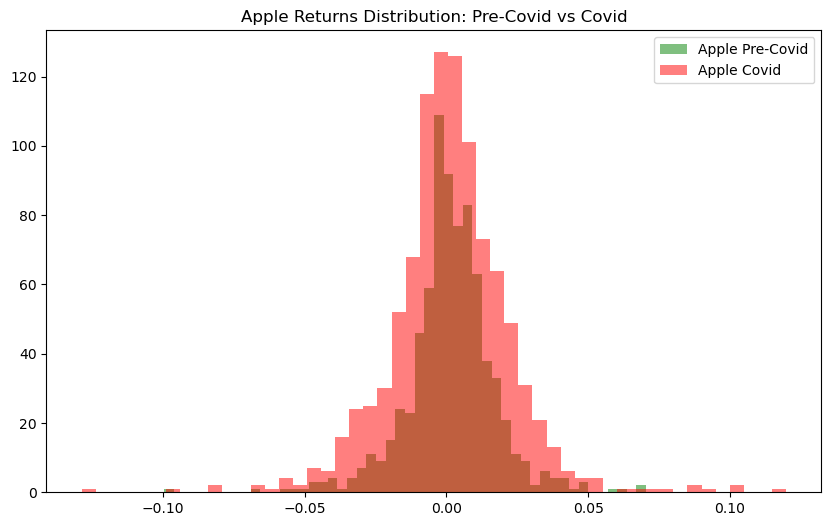

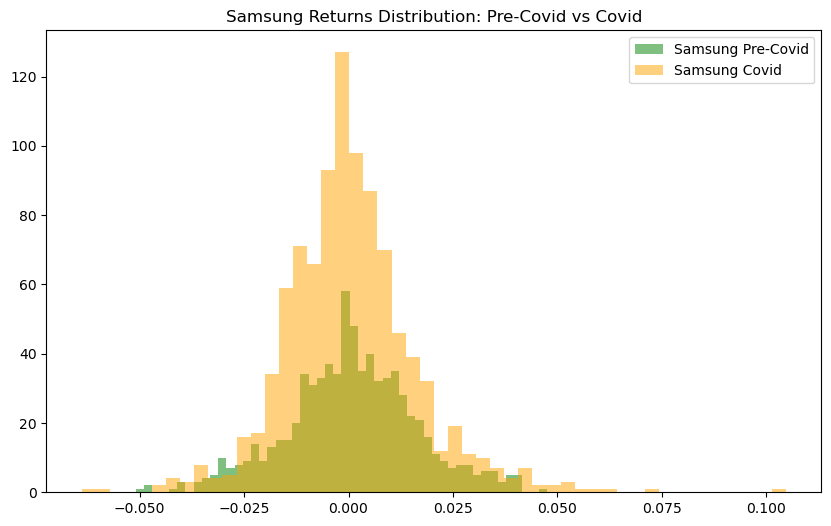

In [45]:
# Histogram of returns for Apple
plt.figure(figsize=(10,6))
plt.hist(apple_pre_covid['Returns'], bins=50, alpha=0.5, label='Apple Pre-Covid', color='green')
plt.hist(apple_covid['Returns'], bins=50, alpha=0.5, label='Apple Covid', color='red')
plt.title('Apple Returns Distribution: Pre-Covid vs Covid')
plt.legend()
plt.savefig('my_plot5.png')
plt.show()

# Histogram of returns for Samsung
plt.figure(figsize=(10,6))
plt.hist(samsung_pre_covid['Returns'], bins=50, alpha=0.5, label='Samsung Pre-Covid', color='green')
plt.hist(samsung_covid['Returns'], bins=50, alpha=0.5, label='Samsung Covid', color='orange')
plt.title('Samsung Returns Distribution: Pre-Covid vs Covid')
plt.legend()
plt.savefig('my_plot6.png')
plt.show()


Slope: 0.06785851519423391
Intercept: 0.0005912333320155943
R-squared: 0.006607085587250065
P-value: 0.0009172426793016818
Standard Error: 0.0204346711079333


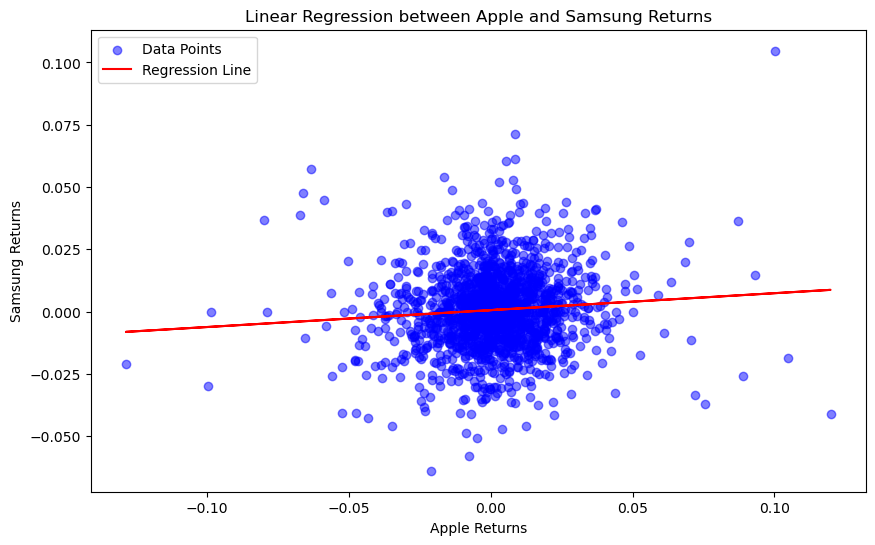

In [47]:
# Linear regression between Apple and Samsung
# 
returns_data = pd.DataFrame({'Apple Returns': apple['Returns'], 'Samsung Returns': samsung['Returns']}).dropna()

# 2. Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(returns_data['Apple Returns'], returns_data['Samsung Returns'])

# Print the regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

# 3. Plot the scatter plot of Apple vs Samsung returns
plt.figure(figsize=(10,6))
plt.scatter(returns_data['Apple Returns'], returns_data['Samsung Returns'], alpha=0.5, label='Data Points', color='blue')

# 4. Plot the regression line
plt.plot(returns_data['Apple Returns'], intercept + slope * returns_data['Apple Returns'], color='red', label='Regression Line')

# Add labels and title
plt.title('Linear Regression between Apple and Samsung Returns')
plt.xlabel('Apple Returns')
plt.ylabel('Samsung Returns')
plt.legend()
plt.savefig('my_plot4.png')


# Display the plot
plt.show()
